# Neural Nets

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, classification_report
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] = 'green'

In [31]:
import warnings
warnings.simplefilter('ignore')

In [56]:
train = pd.read_csv('../../1 - Base de Datos/trainset.csv')
test = pd.read_csv('../../1 - Base de Datos/testset.csv')

After importing, we would like to get rid of the useless variables

In [33]:
train = train.drop(['t_mode0', 'id'], axis = 1)
train

,t_key0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
0,2.217079,139.731735,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
1,4.304625,140.968215,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
2,4.304625,109.520185,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
3,3.828397,75.954987,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
4,3.828397,91.244224,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
55538,2.792290,99.378858,0.801867,0.794231,0.028857,0.372771,0.019271,0.075931,0.508438,28.594121,21.0,2
55539,4.759356,67.733880,1.578883,1.080321,0.026234,0.055875,0.090453,0.055344,0.577249,29.173179,61.0,4
55540,1.585640,79.729721,1.151453,0.539139,0.060791,0.356601,0.146158,0.080106,0.186817,30.648736,46.0,3
55541,0.000000,112.341596,0.681757,1.461288,0.038889,0.031446,0.002967,0.135733,0.483206,32.814888,30.0,2


In [34]:
test = test.drop(['id', 't_mode0'], axis = 1)
test

,t_key0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
0,3.873489,102.077431,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
1,1.595405,163.222447,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519311,22.0,2
2,4.359420,113.531849,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369466,22.0,2
3,3.873489,96.792058,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618253,50.0,3
4,4.359420,102.640814,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157346,35.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13915,2.818702,99.719943,1.600679,0.831035,0.037569,0.018946,0.103679,0.069281,0.600305,24.187839,38.0,2
13916,2.234779,101.497935,1.019791,0.959192,0.110699,0.217217,0.000132,0.084223,0.559692,22.902542,13.0,1
13917,0.872924,94.083818,1.800220,0.697523,0.098733,0.055606,0.000030,0.128551,0.557033,24.600775,37.0,2
13918,4.359420,151.217941,0.663220,1.584771,0.076646,0.000053,0.147484,0.085346,0.373928,32.167957,28.0,2


Remove variables high in popularity as they are underrepresented

In [35]:
# train = train.drop(train[train['popularity'] > 60].index)
# test = test.drop(test[test['popularity'] > 60].index)


Check the shapes of the dataframes we are working with here

In [36]:
print(train.shape)
print(test.shape)

(55543, 12)
(13920, 12)


Generate X_train, X_test, y_train, y_test

In [37]:
X_train = train.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_train_reg = train['popularity']
y_train_clas = train['ClasePopularidad']
X_test = test.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_test_reg = test['popularity']
y_test_clas = test['ClasePopularidad']


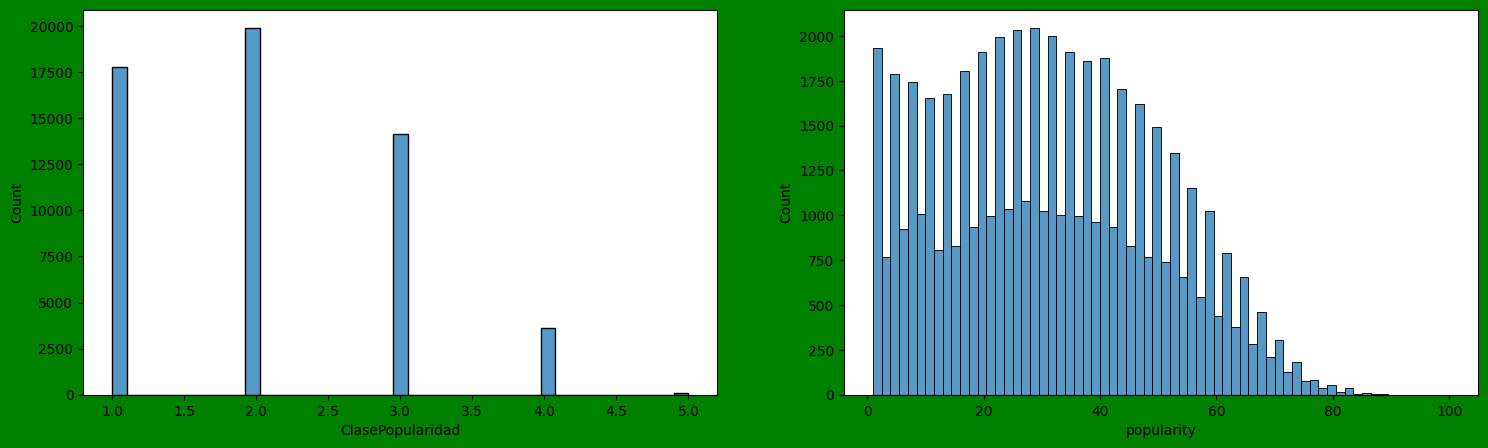

In [38]:
fig, axs = plt.subplots(1, 2, figsize = (18, 5)) # This is tuple unpacking at its best
axs[0] = sns.histplot(y_train_clas, ax = axs[0])
axs[1] = sns.histplot(train['popularity'], ax = axs[1])


Generate X_train_scaled, X_test_scaled.
To do that we will import Standard Scaler from sklearn.preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler
# Instantiate the Object
scaler = StandardScaler()
# Fit the object to the train dataset
scaler.fit(X_train)
# Transform the train and test dataset (note we do not fit to the test in order to prevent leakage)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Also reduce the dimensionality of the features with PCA, applied to the previously generated X_train_scaled

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

Initialize the Neural Net.
We are going to use a Multi-Layer-Perceptron here, to check out how it performs.  
I suspect it will probably do better than earlier methods.  
We are going to use 4 neural networks:  
<ul>
<li> nn1: x_train_scaled to popularity (regression)
<li> nn2: x_train_scaled to ClasePopularidad (classification)
<li> nn3: x_train_scaled_pca to popularity (regression)
<li> nn4: x_train_scaled_pca to ClasePopularidad (classification)  
<ul>  

Each will have a different structure based on the inputs it receives

In [41]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
neural_net1 = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 16), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)
neural_net2 = MLPClassifier(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 16), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)
neural_net3 = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (10, 10, 10, 10, 10), solver = 'adam', random_state = 42, tol = 0.00005, verbose = True)
neural_net4 = MLPClassifier(max_iter = 300, activation = 'relu', hidden_layer_sizes = (10, 10, 10, 10, 10), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)

Fit & predict each neural net

Neural Net 1: x_train_scaled to y_test_reg

In [42]:
neural_net1.fit(X_train_scaled, y_train_reg)

MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=300, random_state=42,
             tol=5e-05)

In [43]:
y_pred = neural_net1.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred, index=y_test_reg.index)
y_test = pd.DataFrame(y_test_reg)
diff = pd.concat([y_pred, y_test], axis=1)
diff = diff.rename(columns={0: 'y_pred', 'popularity': 'y_test'})
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es: {mse} y el r2 es: {r_squared}')
print(diff)

El mse es: 315.1219026067942 y el r2 es: 0.08046381288077509
          y_pred  y_test
0      29.726743    56.0
1      18.958260    22.0
2      35.620227    22.0
3      35.156393    50.0
4      38.630089    35.0
...          ...     ...
13915  26.229215    38.0
13916  25.130310    13.0
13917  29.844584    37.0
13918  28.061042    28.0
13919  26.462940    54.0

[13920 rows x 2 columns]


Neural Net 2: x_train_scaled to y_test_clas

In [44]:
neural_net2.fit(X_train_scaled, y_train_clas)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=300, random_state=42,
              tol=5e-05)

In [45]:
y_pred = neural_net2.predict(X_test_scaled) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_clas)
diff = pd.concat([y_pred, y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'ClasePopularidad' : 'y_test' })
conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test, y_pred))

El F1 Score del modelo es de 0.38357048953134426
              precision    recall  f1-score   support

           1       0.45      0.47      0.46      4488
           2       0.38      0.54      0.45      4914
           3       0.38      0.24      0.29      3592
           4       0.00      0.00      0.00       904
           5       0.00      0.00      0.00        22

    accuracy                           0.41     13920
   macro avg       0.24      0.25      0.24     13920
weighted avg       0.38      0.41      0.38     13920



Podemos observar que el modelo con la red neural es apenas mejor que el modelo realizado con un Random Forest 

In [46]:
conf

,0,1,2,3,4
0,2120,1916,452,0,0
1,1566,2668,680,0,0
2,818,1910,864,0,0
3,206,432,266,0,0
4,10,5,7,0,0


In [47]:
diff

,y_pred,y_test
0,1,3
1,1,2
2,2,2
3,2,3
4,2,2
...,...,...
13915,1,2
13916,1,1
13917,1,2
13918,1,2


Neural Net 3: X_train_scaled_pca a y_test_reg

In [48]:
neural_net3.fit(X_train_scaled_pca, y_train_reg)

Iteration 1, loss = 414.38576623
Iteration 2, loss = 176.33362986
Iteration 3, loss = 167.35006730
Iteration 4, loss = 165.29891642
Iteration 5, loss = 164.58361984
Iteration 6, loss = 164.22281813
Iteration 7, loss = 163.99493134
Iteration 8, loss = 163.79691641
Iteration 9, loss = 163.63811153
Iteration 10, loss = 163.53884193
Iteration 11, loss = 163.47658847
Iteration 12, loss = 163.39637914
Iteration 13, loss = 163.35032836
Iteration 14, loss = 163.23847191
Iteration 15, loss = 163.21823858
Iteration 16, loss = 163.09380609
Iteration 17, loss = 163.10808866
Iteration 18, loss = 163.11699708
Iteration 19, loss = 163.10983302
Iteration 20, loss = 163.04897494
Iteration 21, loss = 162.95870211
Iteration 22, loss = 162.92159852
Iteration 23, loss = 162.86886055
Iteration 24, loss = 162.89295732
Iteration 25, loss = 163.02007204
Iteration 26, loss = 162.86402453
Iteration 27, loss = 162.81454646
Iteration 28, loss = 162.85321094
Iteration 29, loss = 162.75644341
Iteration 30, loss = 16

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300,
             random_state=42, tol=5e-05, verbose=True)

In [49]:
print(X_train_scaled_pca.shape)
print(X_test_scaled_pca.shape)

(55543, 4)
(13920, 4)


In [51]:
y_pred = neural_net3.predict(X_test_scaled_pca) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_reg)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')
diff

El mse es : 328.476012282805 y el r2 es : 0.04149607692757695


,y_pred,y_test
0,32.624826,56.0
1,35.112081,22.0
2,34.207630,22.0
3,33.130133,50.0
4,34.261969,35.0
...,...,...
13915,32.264112,38.0
13916,25.755572,13.0
13917,24.343720,37.0
13918,33.181569,28.0


Neural Net 4: X_train_scaled_pca a y_test_clas

In [52]:
neural_net4.fit(X_train_scaled_pca, y_train_clas)

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300,
              random_state=42, tol=5e-05)

In [53]:
y_pred = neural_net4.predict(X_test_scaled_pca) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_clas)
diff = pd.concat([y_pred, y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'ClasePopularidad' : 'y_test' })
conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test, y_pred))

El F1 Score del modelo es de 0.3437457683879313
              precision    recall  f1-score   support

           1       0.43      0.41      0.42      4488
           2       0.37      0.65      0.47      4914
           3       0.40      0.11      0.17      3592
           4       0.00      0.00      0.00       904
           5       0.00      0.00      0.00        22

    accuracy                           0.39     13920
   macro avg       0.24      0.23      0.21     13920
weighted avg       0.37      0.39      0.34     13920



In [54]:
diff

,y_pred,y_test
0,2,3
1,2,2
2,2,2
3,2,3
4,2,2
...,...,...
13915,2,2
13916,1,1
13917,1,2
13918,2,2


In [55]:
conf

,0,1,2,3,4
0,1836,2455,197,0,0
1,1403,3184,327,0,0
2,829,2380,383,0,0
3,230,619,55,0,0
4,7,14,1,0,0
